In [ ]:
# As for hyperparameter tuning required tensorflow 2.12.0 version
!pip install tensorflow==2.12.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.9/585.9 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 93.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 106.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 41.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.4
    Uninstalling gast-0.5.4:
      Successfully uninstalled gast-0.5.4
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.

In [ ]:
import keras
keras.__version__

'2.12.0'

In [ ]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#changing to current working directory
import os

project_folder = "drive//MyDrive//faceExpressionRecognition"
os.chdir(project_folder)

os.getcwd()

'/content/drive/MyDrive/faceExpressionRecognition'

**<u>Importing Libraries</u>**

In [ ]:
# Importing libraries
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,Activation
from keras.layers import LeakyReLU
from keras.layers import MaxPool2D,Dropout,BatchNormalization,MaxPooling2D
from keras.applications import VGG16
from tensorflow.keras.layers import Input, Lambda

from keras.regularizers import l2,l1
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from keras import regularizers

from keras.callbacks import EarlyStopping,ModelCheckpoint

from tensorflow.keras.callbacks import TensorBoard
import datetime
import tensorflow as tf

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

**<u>Loading Data set and normalizing</u>**

In [ ]:
training_img = np.load('dataFiles//training_img.npy')
training_label = np.load('dataFiles//training_label.npy')

valid_img = np.load('dataFiles//valid_img.npy')
valid_label = np.load('dataFiles//valid_label.npy')


training_img = np.array(training_img).reshape(-1,64,64,1)
training_label = np.array(training_label)

valid_img = np.array(valid_img).reshape(-1,64,64,1)
valid_label = np.array(valid_label)

training_img = training_img/255.0
valid_img = valid_img/255.0

**<u>User defined functions helps to unnderstand the model performance</u>**

In [ ]:
def total_no_misclassified(cm):
    total_sum_confusion_matrix = sum(cm)
    for i in range(len(cm)):
        total_sum_confusion_matrix[i] = total_sum_confusion_matrix[i]-(cm[i][i])
    return sum(total_sum_confusion_matrix)


def plot_accuracy_loss(history):
    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


def plot_cofusion_matrix_two_models(cm1,cm2,
                             title1,title2):
    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(valid_label),
                yticklabels=np.unique(valid_label))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title1)

    plt.subplot(1,2,2)
    sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(valid_label),
                yticklabels=np.unique(valid_label))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(title2)

    plt.show()

**<u>Basic CNN Architecture and Data augumentation</u>**

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    featurewise_std_normalization=False,
    rotation_range=10,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=[0.6, 0.8],
    horizontal_flip=True,
)

In [ ]:
def Model_architecture1():
    """
    This function helps to create a
    model architecture.
    Parameters
    ----------
      None
    Returns
    --------
      Model : object
    """
    model = Sequential()

    model.add(Conv2D(64, kernel_size=3, activation='relu',
                     input_shape=(64,64,1)))
    model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=3,padding='same'))

    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
    model.add(MaxPool2D(pool_size=3,padding='same'))

    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(7, activation='softmax'))

    return model


model = Model_architecture1()
model.summary()


Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_588 (Conv2D)         (None, 62, 62, 64)        640       
                                                                 
 conv2d_589 (Conv2D)         (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_332 (MaxPooli  (None, 21, 21, 64)       0         
 ng2D)                                                           
                                                                 
 conv2d_590 (Conv2D)         (None, 21, 21, 128)       73856     
                                                                 
 conv2d_591 (Conv2D)         (None, 21, 21, 128)       147584    
                                                                 
 max_pooling2d_333 (MaxPooli  (None, 7, 7, 128)        0         
 ng2D)                                               

In [ ]:
model = Model_architecture1()
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
				  loss='sparse_categorical_crossentropy',
				  metrics=['accuracy']
				  )

history = model.fit(training_img, training_label,
						validation_data=(valid_img, valid_label),
						epochs=20,batch_size = 64,
						              verbose=2)

Epoch 1/20
403/403 - 28s - loss: 1.7406 - accuracy: 0.3014 - val_loss: 1.6109 - val_accuracy: 0.3866 - 28s/epoch - 69ms/step
Epoch 2/20
403/403 - 11s - loss: 1.5548 - accuracy: 0.4020 - val_loss: 1.5135 - val_accuracy: 0.4213 - 11s/epoch - 26ms/step
Epoch 3/20
403/403 - 11s - loss: 1.4573 - accuracy: 0.4438 - val_loss: 1.4604 - val_accuracy: 0.4311 - 11s/epoch - 27ms/step
Epoch 4/20
403/403 - 11s - loss: 1.3828 - accuracy: 0.4742 - val_loss: 1.3865 - val_accuracy: 0.4759 - 11s/epoch - 27ms/step
Epoch 5/20
403/403 - 12s - loss: 1.3103 - accuracy: 0.5025 - val_loss: 1.3513 - val_accuracy: 0.4888 - 12s/epoch - 29ms/step
Epoch 6/20
403/403 - 11s - loss: 1.2538 - accuracy: 0.5297 - val_loss: 1.3346 - val_accuracy: 0.5007 - 11s/epoch - 27ms/step
Epoch 7/20
403/403 - 11s - loss: 1.1995 - accuracy: 0.5489 - val_loss: 1.2932 - val_accuracy: 0.5080 - 11s/epoch - 28ms/step
Epoch 8/20
403/403 - 11s - loss: 1.1471 - accuracy: 0.5716 - val_loss: 1.2598 - val_accuracy: 0.5276 - 11s/epoch - 27ms/step


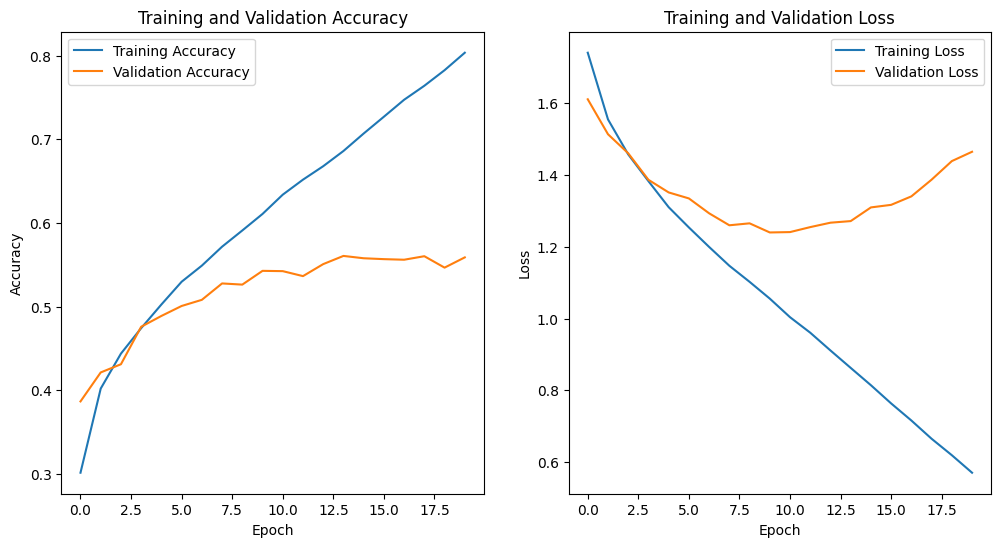

In [ ]:
plot_accuracy_loss(history)

In [ ]:
score = model.evaluate(valid_img, valid_label, verbose = 0)

print('Test score: {}'.format(score[1] * 100))
print("CNN Error: %.2f%%" % (100 - score[1] * 100))

Test loss: 146.46422863006592%
Test score: 55.878233909606934%
MLP Error: 44.12%


In [ ]:
y_pred1 = model.predict(valid_img,verbose=0)
y_pred_classes1 = np.argmax(y_pred1, axis=1)

cm1 = confusion_matrix(valid_label, y_pred_classes1)

cm1

array([[167,   4,  58,  46,  55,  50,  17],
       [  9,  14,   7,   2,   4,   6,   1],
       [ 43,   4, 166,  27,  45,  76,  47],
       [ 16,   0,  33, 572,  42,  39,  17],
       [ 41,   0,  51,  53, 270,  61,  18],
       [ 43,   3,  68,  68,  94, 187,  18],
       [  8,   1,  33,  23,  14,  16, 221]])

**<u>Model Architecture 2</u>**

From above graph we can see model is not generalising the pattern we make some more complex. Added more convolutional layers, decresed pool size,kernel regularization.

In [ ]:
def Model_architecture2():
    """
    This function helps to create a
    model architecture.
    Parameters
    ----------
      None
    Returns
    --------
      Model : object
    """
    model = Sequential()

    model.add(Conv2D(64, kernel_size=2, activation='relu',
                     kernel_regularizer=l1(0.001),input_shape=(64,64,1)))
    model.add(Conv2D(64, kernel_size=2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=2,padding='same'))

    model.add(Conv2D(128, kernel_size=2, activation='relu',padding='same',
                     kernel_regularizer=l2(0.001)))
    model.add(Conv2D(128, kernel_size=2, activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=2,padding='same'))
    model.add(Dropout(0.2))

    model.add(Conv2D(256, kernel_size=2, activation='relu',padding='same',
                     kernel_regularizer=l2(0.001)))
    model.add(Conv2D(256, kernel_size=2, activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=2,padding='same'))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(256,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(7, activation='softmax'))

    return model


model = Model_architecture2()
model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_114 (Conv2D)         (None, 63, 63, 64)        320       
                                                                 
 conv2d_115 (Conv2D)         (None, 62, 62, 64)        16448     
                                                                 
 batch_normalization_48 (Bat  (None, 62, 62, 64)       256       
 chNormalization)                                                
                                                                 
 max_pooling2d_62 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_116 (Conv2D)         (None, 31, 31, 128)       32896     
                                                                 
 conv2d_117 (Conv2D)         (None, 31, 31, 128)     

In [ ]:
model = Model_architecture2()
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
				  loss='sparse_categorical_crossentropy',
				  metrics=['accuracy']
				  )

history = model.fit(training_img, training_label,
						validation_data=(valid_img, valid_label),
						epochs=20,batch_size = 64,
						              verbose=2)

Epoch 1/20
403/403 - 34s - loss: 1.8151 - accuracy: 0.2780 - val_loss: 2.6620 - val_accuracy: 0.2229 - 34s/epoch - 85ms/step
Epoch 2/20
403/403 - 27s - loss: 1.6367 - accuracy: 0.3493 - val_loss: 1.5615 - val_accuracy: 0.3754 - 27s/epoch - 68ms/step
Epoch 3/20
403/403 - 27s - loss: 1.5466 - accuracy: 0.3921 - val_loss: 1.5692 - val_accuracy: 0.4080 - 27s/epoch - 68ms/step
Epoch 4/20
403/403 - 28s - loss: 1.4752 - accuracy: 0.4271 - val_loss: 1.4754 - val_accuracy: 0.4223 - 28s/epoch - 69ms/step
Epoch 5/20
403/403 - 27s - loss: 1.4225 - accuracy: 0.4504 - val_loss: 1.3820 - val_accuracy: 0.4633 - 27s/epoch - 68ms/step
Epoch 6/20
403/403 - 28s - loss: 1.3613 - accuracy: 0.4744 - val_loss: 1.3201 - val_accuracy: 0.4944 - 28s/epoch - 68ms/step
Epoch 7/20
403/403 - 28s - loss: 1.3143 - accuracy: 0.4932 - val_loss: 1.3611 - val_accuracy: 0.4818 - 28s/epoch - 69ms/step
Epoch 8/20
403/403 - 27s - loss: 1.2628 - accuracy: 0.5155 - val_loss: 1.2742 - val_accuracy: 0.5094 - 27s/epoch - 68ms/step


In [ ]:
score = model.evaluate(valid_img, valid_label, verbose = 0)

print('Test score: {:.2f}%'.format(score[1] * 100))
print("CNN Error: {:.2f}%".format((100 - score[1] * 100)))

Test score: 56.19%
CNN Error: 43.81%


90/90 [==============================] - 1s 7ms/step


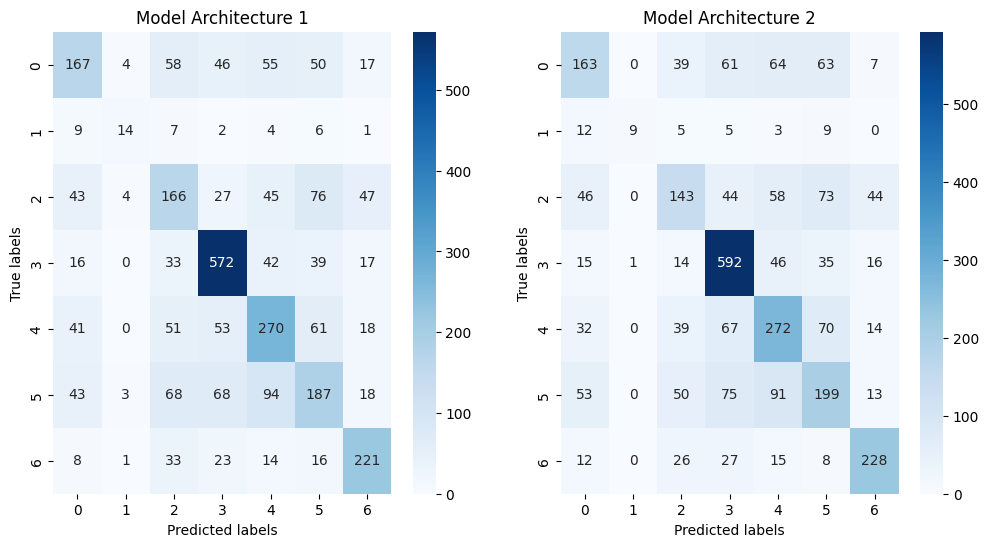

In [ ]:
y_pred2 = model.predict(valid_img)
y_pred_classes = np.argmax(y_pred2, axis=1)

cm2 = confusion_matrix(valid_label, y_pred_classes)

title1 = "Model Architecture 1"
title2 = 'Model Architecture 2'
plot_cofusion_matrix_two_models(cm1,cm2,title1,title2)


In [ ]:
print("Total no misclassified classes for model architecture1 is {}".format(
    total_no_misclassified(cm1)))
print("Total no misclassified classes for model architecture2 is {}".format(
    total_no_misclassified(cm2)))

<u>Observation:</u>

Model architecture2 gives good result than model architecture1.

Model architecture2 is overfitting so we will increse dropout rate in next architecture

In [ ]:
datagen.fit(training_img)
model = Model_architecture2()
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
				  loss='sparse_categorical_crossentropy',
				  metrics=['accuracy']
				  )
history = model.fit(datagen.flow(training_img, training_label, batch_size=32),
                    steps_per_epoch=len(training_img) / 32,
                    validation_data=(valid_img, valid_label),epochs=10)

Epoch 1/10
804/804 [==============================] - 46s 48ms/step - loss: 2.6777 - accuracy: 0.0249 - val_loss: 3.6141 - val_accuracy: 0.0066
Epoch 2/10
804/804 [==============================] - 60s 75ms/step - loss: 1.9534 - accuracy: 0.0014 - val_loss: 10.2834 - val_accuracy: 0.0000e+00
Epoch 3/10
804/804 [==============================] - 63s 78ms/step - loss: 1.8762 - accuracy: 0.0015 - val_loss: 15.6076 - val_accuracy: 0.0115
Epoch 4/10
804/804 [==============================] - 54s 67ms/step - loss: 1.8354 - accuracy: 5.4365e-04 - val_loss: 5.6988 - val_accuracy: 0.0010
Epoch 5/10
804/804 [==============================] - 49s 61ms/step - loss: 1.8172 - accuracy: 3.8832e-05 - val_loss: 1.8129 - val_accuracy: 0.0000e+00
Epoch 6/10
804/804 [==============================] - 41s 51ms/step - loss: 1.8119 - accuracy: 0.0000e+00 - val_loss: 1.8102 - val_accuracy: 0.0000e+00
Epoch 7/10
804/804 [==============================] - 44s 55ms/step - loss: 1.8173 - accuracy: 2.7182e-04 - va

In [ ]:
score = model.evaluate(valid_img, valid_label, verbose = 0)
print('Test score: {:.2f}%'.format(score[1] * 100))

print("CNN Error: {:.2f}%".format((100 - score[1] * 100)))

Test score: 0.00%
CNN Error: 100.00%


**<u>Model architecture3</u>**

In [ ]:
def Model_architecture3(dropout_rate=0.2,
                        optimiser='adam',
                        learning_rate=0.001,
                        batch_size=64):
    """
    This function helps to create a
    model architecture.
    Parameters
    ----------
      None
    Returns
    --------
      Model : object
    """
    model = Sequential()

    model.add(Conv2D(64, kernel_size=3, activation='relu',
                     kernel_regularizer=l2(0.001),
                     input_shape=(64,64,1)))
    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=2,padding='same'))
    model.add(Dropout(dropout_rate))

    model.add(Conv2D(128, kernel_size=3, activation='relu',
                     kernel_regularizer=l2(0.001),padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, kernel_size=3, activation='relu',
                     padding='same'))
    model.add(MaxPool2D(pool_size=2,padding='same'))
    model.add(Dropout(dropout_rate))

    model.add(Conv2D(256, kernel_size=3, activation='relu',
                     kernel_regularizer=l2(0.001),padding='same'))
    model.add(Conv2D(256, kernel_size=3, activation='relu',
                     padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPool2D(pool_size=2,padding='same'))

    model.add(Conv2D(512, kernel_size=3, activation='relu',
                     kernel_regularizer=l2(0.001),padding='same'))
    model.add(MaxPool2D(pool_size=2,padding='same'))
    model.add(Dropout(dropout_rate))


    model.add(Flatten())
    model.add(Dense(512,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(7, activation='softmax'))

    model.compile(optimizer=optimiser,
				  loss='sparse_categorical_crossentropy',
				  metrics=['accuracy']
				  )


    return model


model = Model_architecture3()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 128)       7

In [ ]:
model = Model_architecture3()
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),
				  loss='sparse_categorical_crossentropy',
				  metrics=['accuracy']
				  )

history = model.fit(training_img, training_label,
						validation_data=(valid_img, valid_label),
						epochs=20,batch_size = 64,
						              verbose=2)

Epoch 1/20
403/403 - 35s - loss: 2.4259 - accuracy: 0.2458 - val_loss: 2.8155 - val_accuracy: 0.2628 - 35s/epoch - 86ms/step
Epoch 2/20
403/403 - 28s - loss: 2.2386 - accuracy: 0.3253 - val_loss: 2.1734 - val_accuracy: 0.3653 - 28s/epoch - 69ms/step
Epoch 3/20
403/403 - 28s - loss: 2.0804 - accuracy: 0.3904 - val_loss: 2.4849 - val_accuracy: 0.3460 - 28s/epoch - 68ms/step
Epoch 4/20
403/403 - 28s - loss: 1.9348 - accuracy: 0.4428 - val_loss: 2.0057 - val_accuracy: 0.4234 - 28s/epoch - 69ms/step
Epoch 5/20
403/403 - 28s - loss: 1.8143 - accuracy: 0.4761 - val_loss: 1.8439 - val_accuracy: 0.4731 - 28s/epoch - 68ms/step
Epoch 6/20
403/403 - 27s - loss: 1.7100 - accuracy: 0.5123 - val_loss: 1.6475 - val_accuracy: 0.5343 - 27s/epoch - 67ms/step
Epoch 7/20
403/403 - 28s - loss: 1.6225 - accuracy: 0.5400 - val_loss: 1.6158 - val_accuracy: 0.5283 - 28s/epoch - 69ms/step
Epoch 8/20
403/403 - 27s - loss: 1.5448 - accuracy: 0.5585 - val_loss: 1.5411 - val_accuracy: 0.5602 - 27s/epoch - 67ms/step


In [ ]:
score = model.evaluate(valid_img, valid_label, verbose = 0)

# Assuming y_true and y_pred are your true and predicted labels
y_pred3 = model.predict(valid_img)
y_pred_classes = np.argmax(y_pred3, axis=1)

# Calculate F1 score for each class and then average them
f1 = f1_score(valid_label, y_pred_classes, average='weighted')

print("F1 Score: {:.4f}".format(f1))
print('Test score: {:.2f}%'.format(score[1] * 100))

print("CNN Error: {:.2f}%".format((100 - score[1] * 100)))

90/90 [==============================] - 1s 8ms/step
F1 Score: 0.6180
Test score: 62.70%
CNN Error: 37.30%


90/90 [==============================] - 1s 8ms/step


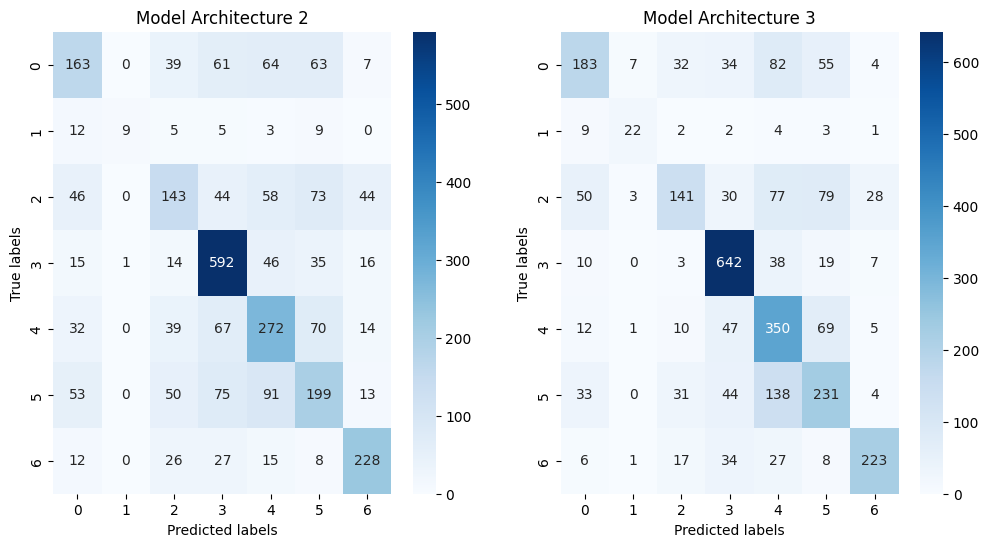

In [ ]:
y_pred3 = model.predict(valid_img)
y_pred_classes = np.argmax(y_pred3, axis=1)

cm3 = confusion_matrix(valid_label, y_pred_classes)

title1 = "Model Architecture 2"
title2 = 'Model Architecture 3'
plot_cofusion_matrix_two_models(cm2,cm3,title1,title2)

In [ ]:
print("Total no misclassified classes for model architecture1 is {}".format(
    total_no_misclassified(cm2)))
print("Total no misclassified classes for model architecture2 is {}".format(
    total_no_misclassified(cm3)))

Total no misclassified classes for model architecture1 is 1252
Total no misclassified classes for model architecture2 is 1066


<u>Observation</u> Model architecture 3 gives good result than model architecture 2. As the result we will use this model 3 architecture for production.

In [ ]:
datagen.fit(training_img)
model = Model_architecture3()
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
				  loss='sparse_categorical_crossentropy',
				  metrics=['accuracy']
				  )
history = model.fit(datagen.flow(training_img, training_label, batch_size=32),
                    steps_per_epoch=len(training_img) / 32,
                    validation_data=(valid_img, valid_label),epochs=10)

Epoch 1/10
804/804 [==============================] - 47s 50ms/step - loss: 1.8907 - accuracy: 0.0025 - val_loss: 1.8451 - val_accuracy: 0.0000e+00
Epoch 2/10
804/804 [==============================] - 44s 55ms/step - loss: 1.8315 - accuracy: 0.0000e+00 - val_loss: 1.8219 - val_accuracy: 0.0000e+00
Epoch 3/10
804/804 [==============================] - 40s 49ms/step - loss: 1.8178 - accuracy: 0.0000e+00 - val_loss: 1.8141 - val_accuracy: 0.0000e+00
Epoch 4/10
804/804 [==============================] - 46s 57ms/step - loss: 1.8129 - accuracy: 0.0000e+00 - val_loss: 1.8110 - val_accuracy: 0.0000e+00
Epoch 5/10
804/804 [==============================] - 38s 47ms/step - loss: 1.8109 - accuracy: 0.0000e+00 - val_loss: 1.8098 - val_accuracy: 0.0000e+00
Epoch 6/10
804/804 [==============================] - 39s 48ms/step - loss: 1.8102 - accuracy: 0.0000e+00 - val_loss: 1.8094 - val_accuracy: 0.0000e+00
Epoch 7/10
804/804 [==============================] - 44s 54ms/step - loss: 1.8100 - accurac

In [ ]:
score = model.evaluate(valid_img, valid_label, verbose = 0)
# Assuming y_true and y_pred are your true and predicted labels
y_pred3 = model.predict(valid_img)
y_pred_classes = np.argmax(y_pred3, axis=1)

# Calculate F1 score for each class and then average them
f1 = f1_score(valid_label, y_pred_classes, average='weighted')

print("F1 Score: {:.4f}".format(f1))
print('Test score: {:.2f}%'.format(score[1] * 100))

print("CNN Error: {:.2f}%".format((100 - score[1] * 100)))

90/90 [==============================] - 1s 8ms/step
F1 Score: 0.1011
Test score: 0.00%
CNN Error: 100.00%


<u>Observation</u>

Model 3 architecture failed to give good result on data augumentation.

Lets do hyper parameter tuning for batch_size, dropout_rate,learing_rate,optimizer using randomised search. As we have less ram access so that no of iteration used is 12.

**<u>Hyperparameter tuning</u>**

In [ ]:
%%time
# Create a KerasClassifier for use in scikit-learn
model = KerasClassifier(build_fn=Model_architecture2, verbose=2)

# Define the hyperparameters to search over
param_dist = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [32, 64,96,128,256],
    'dropout_rate': [0.2, 0.3, 0.4],
    'optimiser': ['adam', 'sgd','rmsprop']
}

# Perform RandomizedSearchCV
n_iter_search = 12
# Set up a TensorBoard callback
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


random_search = RandomizedSearchCV(model, param_distributions=param_dist,
                                   n_iter=n_iter_search)
random_search.fit(training_img, training_label,
                  validation_data=(valid_img, valid_label))
                  #callbacks=[tensorboard_callback])

print("Best parameters found: ", random_search.best_params_)


<timed exec>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


322/322 - 28s - loss: 2.4589 - accuracy: 0.2355 - val_loss: 2.4936 - val_accuracy: 0.2516 - 28s/epoch - 86ms/step
81/81 - 2s - loss: 2.4939 - accuracy: 0.2512 - 2s/epoch - 20ms/step
322/322 - 25s - loss: 2.4436 - accuracy: 0.2437 - val_loss: 2.6103 - val_accuracy: 0.2516 - 25s/epoch - 78ms/step
81/81 - 1s - loss: 2.6178 - accuracy: 0.2572 - 1s/epoch - 15ms/step
322/322 - 26s - loss: 2.4461 - accuracy: 0.2455 - val_loss: 2.4646 - val_accuracy: 0.2516 - 26s/epoch - 81ms/step
81/81 - 2s - loss: 2.4667 - accuracy: 0.2511 - 2s/epoch - 21ms/step
322/322 - 25s - loss: 2.4348 - accuracy: 0.2469 - val_loss: 2.4263 - val_accuracy: 0.2516 - 25s/epoch - 77ms/step
81/81 - 1s - loss: 2.4170 - accuracy: 0.2524 - 1s/epoch - 15ms/step
322/322 - 25s - loss: 2.4440 - accuracy: 0.2410 - val_loss: 2.5290 - val_accuracy: 0.2516 - 25s/epoch - 78ms/step
81/81 - 1s - loss: 2.5276 - accuracy: 0.2449 - 1s/epoch - 16ms/step
215/215 - 28s - loss: 2.4767 - accuracy: 0.2340 - val_loss: 2.4518 - val_accuracy: 0.2516 

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [ ]:
model = Model_architecture2(dropout_rate=0.2,
                        optimiser='sgd',
                        learning_rate=0.001,
                        batch_size=64)

history = model.fit(training_img, training_label,
						validation_data=(valid_img, valid_label),
						epochs=20,batch_size = 64,
						              verbose=2)

Epoch 1/20
403/403 - 31s - loss: 2.4234 - accuracy: 0.2524 - val_loss: 2.4062 - val_accuracy: 0.2617 - 31s/epoch - 76ms/step
Epoch 2/20
403/403 - 27s - loss: 2.3239 - accuracy: 0.2947 - val_loss: 2.2727 - val_accuracy: 0.3230 - 27s/epoch - 67ms/step
Epoch 3/20
403/403 - 27s - loss: 2.2426 - accuracy: 0.3384 - val_loss: 2.1822 - val_accuracy: 0.3705 - 27s/epoch - 68ms/step
Epoch 4/20
403/403 - 28s - loss: 2.1732 - accuracy: 0.3704 - val_loss: 2.1149 - val_accuracy: 0.4017 - 28s/epoch - 69ms/step
Epoch 5/20
403/403 - 28s - loss: 2.1049 - accuracy: 0.3979 - val_loss: 2.0737 - val_accuracy: 0.4125 - 28s/epoch - 69ms/step
Epoch 6/20
403/403 - 27s - loss: 2.0463 - accuracy: 0.4209 - val_loss: 2.0291 - val_accuracy: 0.4255 - 27s/epoch - 67ms/step
Epoch 7/20
403/403 - 28s - loss: 1.9879 - accuracy: 0.4423 - val_loss: 1.9399 - val_accuracy: 0.4615 - 28s/epoch - 69ms/step
Epoch 8/20
403/403 - 27s - loss: 1.9372 - accuracy: 0.4563 - val_loss: 2.0151 - val_accuracy: 0.4181 - 27s/epoch - 67ms/step


In [ ]:
score = model.evaluate(valid_img, valid_label, verbose = 0)
# Assuming y_true and y_pred are your true and predicted labels
y_pred3 = model.predict(valid_img)
y_pred_classes = np.argmax(y_pred3, axis=1)

# Calculate F1 score for each class and then average them
f1 = f1_score(valid_label, y_pred_classes, average='weighted')

print("F1 Score: {:.4f}".format(f1))
print('Test score: {:.2f}%'.format(score[1] * 100))

print("CNN Error: {:.2f}%".format((100 - score[1] * 100)))

90/90 [==============================] - 1s 8ms/step
F1 Score: 0.5159
Test score: 51.29%
CNN Error: 48.71%


In [ ]:
y_pred3 = model.predict(valid_img)
y_pred_classes = np.argmax(y_pred3, axis=1)

cm3 = confusion_matrix(valid_label, y_pred_classes)
print("Total no misclassified classes for model architecture1 is {}".format(
    total_no_misclassified(cm2)))
print("Total no misclassified classes for model architecture2 is {}".format(
    total_no_misclassified(cm3)))

90/90 [==============================] - 1s 8ms/step
Total no misclassified classes for model architecture1 is 1252
Total no misclassified classes for model architecture2 is 1392


As above result is not givinng good  hyperparameters because no of iteration is less. If we tune the hyperparameters with more than 50 iterations it will give result as we will save the model with default arguments.

Here we will use transfer learning that is VGG16 and data augumentation

In [ ]:
# Load the VGG16 model with pretrained ImageNet weights
base_model = VGG16(weights='imagenet', include_top=False,
                   input_shape=(64, 64, 3))

# Customized input layer to accommodate grayscale images
input_layer = Input(shape=(64, 64, 1))
grayscale_to_rgb = Lambda(lambda x: tf.image.grayscale_to_rgb(x))(input_layer)

# Modify the VGG16 model to accept the new input shape
base_model = VGG16(weights='imagenet', include_top=False,
                   input_tensor=grayscale_to_rgb)

# Set the first 15 layers to be trainable (freeze)
for layer in base_model.layers[:15]:
    layer.trainable = True

# Set the last 15 layers to be non-trainable (freeze)
for layer in base_model.layers[15:]:
    layer.trainable = False

model = Sequential()
model.add(base_model)

# add more layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dense(7, activation='softmax'))

opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#datagen.fit(training_img)
datagen.fit(training_img)
history = model.fit(datagen.flow(training_img, training_label, batch_size=32),
                    steps_per_epoch=len(training_img) / 32,
                    validation_data=(valid_img, valid_label),epochs=10)

Epoch 1/10
804/804 [==============================] - 53s 55ms/step - loss: 1.8293 - accuracy: 0.0086 - val_loss: 1.8148 - val_accuracy: 0.0000e+00
Epoch 2/10
804/804 [==============================] - 46s 57ms/step - loss: 1.8177 - accuracy: 7.7664e-05 - val_loss: 1.8124 - val_accuracy: 0.0000e+00
Epoch 3/10
804/804 [==============================] - 45s 55ms/step - loss: 1.8148 - accuracy: 0.0012 - val_loss: 1.8108 - val_accuracy: 0.0000e+00
Epoch 4/10
804/804 [==============================] - 48s 59ms/step - loss: 1.8130 - accuracy: 0.0000e+00 - val_loss: 1.8110 - val_accuracy: 0.0000e+00
Epoch 5/10
804/804 [==============================] - 45s 56ms/step - loss: 1.8144 - accuracy: 0.0000e+00 - val_loss: 1.8099 - val_accuracy: 0.0000e+00
Epoch 6/10
804/804 [==============================] - 45s 55ms/step - loss: 1.8124 - accuracy: 0.0000e+00 - val_loss: 1.8101 - val_accuracy: 0.0000e+00
Epoch 7/10
804/804 [==============================] - 44s 55ms/step - loss: 1.8113 - accuracy: 0

'\nhistory = model.fit(datatraining_img, training_label,\n                    batch_size=64,\n                    #steps_per_epoch=len(training_img) / 64,\n                    validation_data=(valid_img, valid_label),\n                    epochs=20)\n'

In [ ]:
score = model.evaluate(valid_img, valid_label, verbose = 0)
# Assuming y_true and y_pred are your true and predicted labels
y_pred3 = model.predict(valid_img)
y_pred_classes = np.argmax(y_pred3, axis=1)

# Calculate F1 score for each class and then average them
f1 = f1_score(valid_label, y_pred_classes, average='weighted')

print("F1 Score: {:.4f}".format(f1))
print('Test score: {:.2f}%'.format(score[1] * 100))

print("CNN Error: {:.2f}%".format((100 - score[1] * 100)))

90/90 [==============================] - 1s 13ms/step
F1 Score: 0.1011
Test score: 0.00%
CNN Error: 100.00%


In [ ]:
y_pred3 = model.predict(valid_img)
y_pred_classes = np.argmax(y_pred3, axis=1)

cm4 = confusion_matrix(valid_label, y_pred_classes)
print("Total no misclassified classes for model architecture1 is {}".format(
    total_no_misclassified(cm3)))
print("Total no misclassified classes for model architecture2 is {}".format(
    total_no_misclassified(cm4)))

90/90 [==============================] - 1s 14ms/step
Total no misclassified classes for model architecture1 is 1392
Total no misclassified classes for model architecture2 is 2139


VGG16 is not performing good because VGG16 is complex architecture can not handle image dataset having lower dimension. As a result we will finalize the model3 architecture for production.

**<u>k-fold cross validation.</u>**

In [ ]:
# Perform cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []

for train_index, test_index in kfold.split(training_img, training_label):
    X_train, X_test = training_img[train_index], training_img[test_index]
    y_train, y_test = training_label[train_index], training_label[test_index]

    model = Model_architecture3()
    model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

print(f"Accuracy: {np.mean(accuracies):.2f} (+/- {np.std(accuracies):.2f})")

Accuracy: 0.58 (+/- 0.01)


In [ ]:
# Define early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5,
                               restore_best_weights=True)
model_checkpoint = ModelCheckpoint('dataFiles//best_cnn_model.h5',
                                   monitor='val_loss', save_best_only=True)

model = Model_architecture3()

model.fit(training_img, training_label,
          validation_data=(valid_img, valid_label),
          callbacks=[early_stopping, model_checkpoint],
          epochs=40,
          batch_size = 64,
          verbose=2)

Epoch 1/40
403/403 - 38s - loss: 2.3415 - accuracy: 0.2656 - val_loss: 2.6849 - val_accuracy: 0.1956 - 38s/epoch - 95ms/step
Epoch 2/40
403/403 - 28s - loss: 1.8361 - accuracy: 0.3694 - val_loss: 1.9034 - val_accuracy: 0.3551 - 28s/epoch - 69ms/step
Epoch 3/40
403/403 - 29s - loss: 1.6161 - accuracy: 0.4330 - val_loss: 1.6116 - val_accuracy: 0.4311 - 29s/epoch - 72ms/step
Epoch 4/40
403/403 - 29s - loss: 1.4950 - accuracy: 0.4781 - val_loss: 1.4447 - val_accuracy: 0.4804 - 29s/epoch - 72ms/step
Epoch 5/40
403/403 - 28s - loss: 1.4351 - accuracy: 0.4982 - val_loss: 1.4080 - val_accuracy: 0.5175 - 28s/epoch - 70ms/step
Epoch 6/40
403/403 - 28s - loss: 1.3935 - accuracy: 0.5213 - val_loss: 1.4396 - val_accuracy: 0.5094 - 28s/epoch - 68ms/step
Epoch 7/40
403/403 - 28s - loss: 1.3510 - accuracy: 0.5353 - val_loss: 1.4298 - val_accuracy: 0.5227 - 28s/epoch - 68ms/step
Epoch 8/40
403/403 - 29s - loss: 1.3261 - accuracy: 0.5472 - val_loss: 1.3829 - val_accuracy: 0.5238 - 29s/epoch - 71ms/step
